In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import re

In [557]:
loss = np.genfromtxt("..\\tmp_ls.txt")

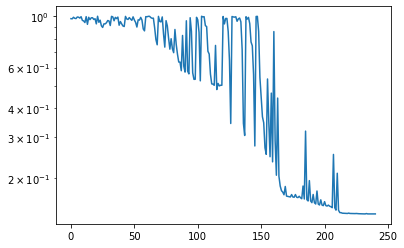

In [558]:
plt.plot(loss)
plt.yscale('log')

In [559]:
loss[-10:]

array([0.1403848 , 0.14034714, 0.14083083, 0.14034687, 0.14034422,
       0.1403632 , 0.14034398, 0.1403435 , 0.14034398, 0.14034323])

In [560]:
# data = np.genfromtxt("data.txt")
with open("..\\tmp_ps.txt") as file:
    lines = file.readlines()

In [561]:
lists = []
for line in tqdm(lines):
    tmp = line[:-1]
    # tmp = tmp.split#re.split("\] \[|\]\[", tmp)
    lists.append([float(item) for item in(tmp.split("\t"))])
    # for tmp_line in tmp:
    #     lists.append([float(item) for item in(tmp_line.split(", "))])

100%|██████████| 241/241 [00:00<00:00, 114088.86it/s]


In [382]:
lists = []
for line in tqdm(lines):
    tmp = line[1:-2]
    tmp = re.split("\] \[|\]\[", tmp)
    for tmp_line in tmp:
        lists.append([float(item) for item in(tmp_line.split(", "))])


100%|██████████| 252/252 [00:00<00:00, 61933.94it/s]


In [562]:
array = np.asarray(lists)
# array = data'2data.txt

In [563]:
# np.savetxt("..\Archive\\2data_clean.txt",array)

In [564]:
# (array[1:] == array[:-1]).sum(0)/(array.shape[0]-1)
(array[1:] == array[:-1]).sum(1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [536]:
array.shape

(119, 15)

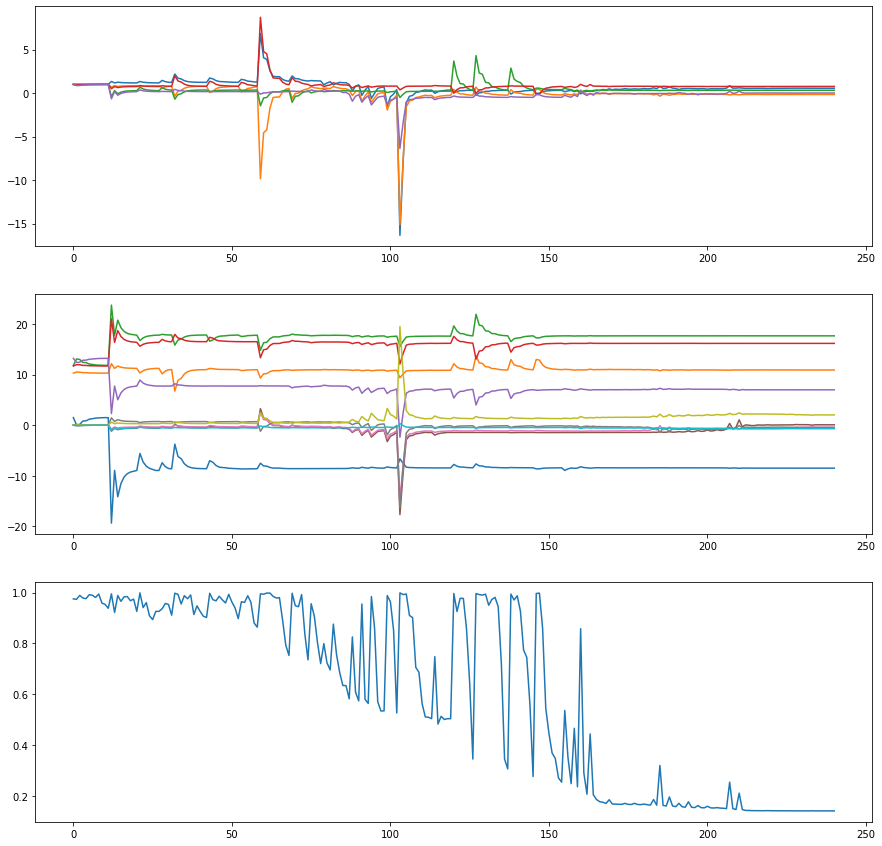

In [565]:
fig, ax = plt.subplots(figsize=(15,15),nrows=3)
ax[0].plot(array[:,:5])
ax[1].plot(array[:,5:])
ax[2].plot(loss)

No handles with labels found to put in legend.


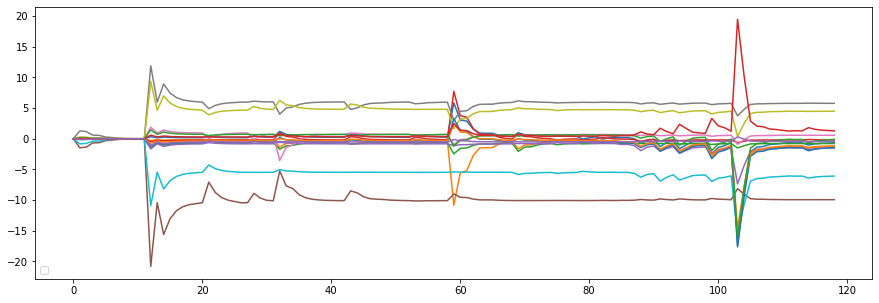

In [538]:
plt.figure(figsize=(15,5))
plt.plot(array-array[0]);
# plt.yscale('log')
# plt.ylim(-1.5,1.5)
# plt.xlim(500,5001)
array[-1] - array[0]
plt.legend(loc=3)

In [484]:
(array[-1][:5].reshape(-1,1)*np.sin(array[-1][5:].reshape(-1,1)*times)).shape

(5, 2000)

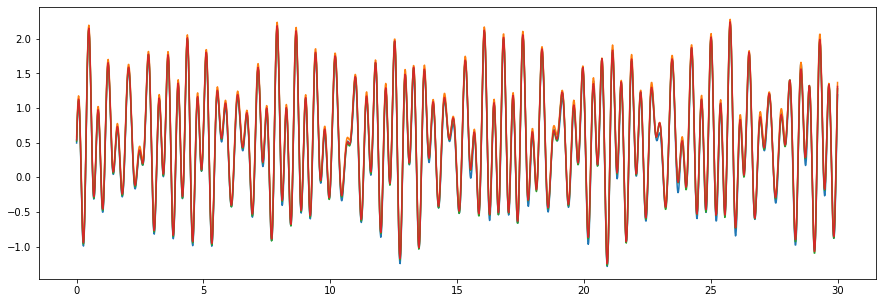

In [570]:
times = np.linspace(0,30,2000)
plt.figure(figsize=(15,5))
for i in [-15,-10,-5,-1]:
    plt.plot(times,(array[i][:5].reshape(-1,1)*np.sin(array[i][5:10].reshape(-1,1)*times) + array[i][10:].reshape(-1,1)).sum(0))

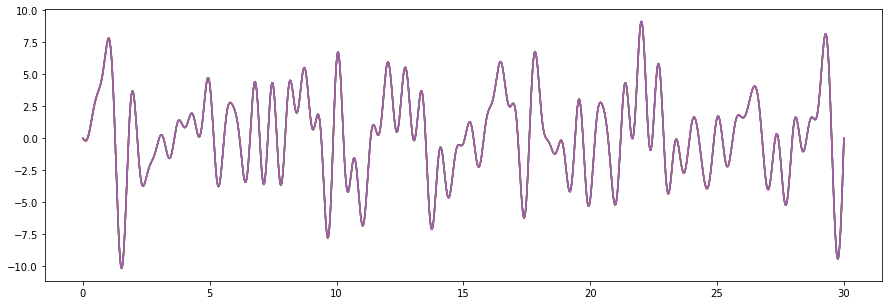

In [351]:
ws = np.arange(1,100+1,1)*np.pi/30

def ret_sig(i):
    return (array[[i]]*np.sin(ws.reshape(1,-1)*times.reshape(-1,1))).sum(1)

plt.figure(figsize=(15,5))
for i in [-5,-4,-3,-2,-1]:
    plt.plot(times,ret_sig(i))

In [359]:
from scipy.stats import chi2
chi2.sf(1.5*100,100)

0.0009039320423540184

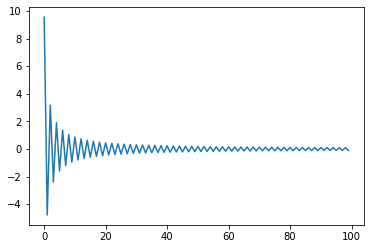

In [269]:
plt.plot(-np.cos(30*ws)/ws)

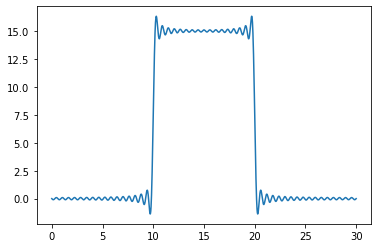

In [298]:
# tmp = +np.sin(15*ws)/ws - np.cos(15*ws)/ws
tmp = - np.cos(20*ws)/ws + np.cos(10*ws)/ws
plt.plot(times,(tmp*np.sin(ws.reshape(1,-1)*times.reshape(-1,1))).sum(1))

In [386]:
labels = ["$T_r$","$T_a$","$T_p$","$\\alpha$min","$\\varphi$","f","A","$\Phi$_ext","$\lambda$"]
array[-1]

array([ 1.80960668, 10.15141551, 10.        ,  0.72653602,  2.81974364,
        2.04486394,  4.08982325,  3.12588469,  0.03571157])

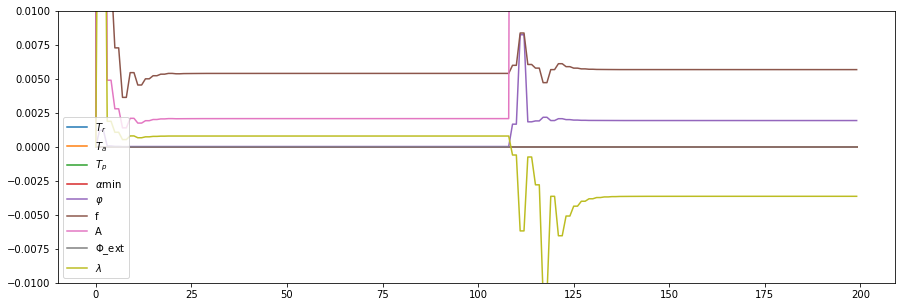

In [421]:
plt.figure(figsize=(15,5))
plt.plot(array-array[0],label=labels);
# plt.yscale('log')
plt.ylim(-0.01,0.01)
# plt.xlim(500,5001)
array[-1] - array[0]
plt.legend(loc=3)

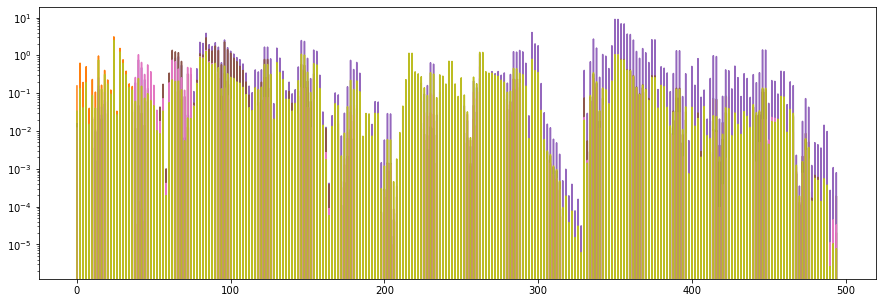

In [193]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(array[1:] - array[:-1]))
plt.yscale('log')

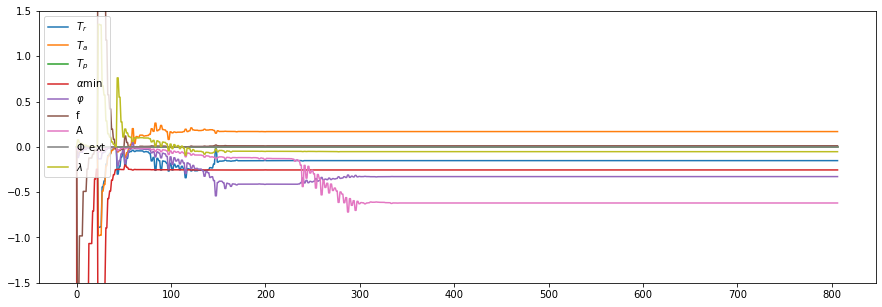

In [115]:
# [Tᵣ, Tₐ, Tₚ, αmin, ϕ, f, A, Φ_ext, λ]

plt.figure(figsize=(15,5))
plt.plot(array-array[0],label=labels);
# plt.yscale('log')
plt.ylim(-1.5,1.5)
# plt.xlim(500,5001)
array[-1] - array[0]
plt.legend()

In [117]:
loss.shape, array.shape

((404,), (807, 9))

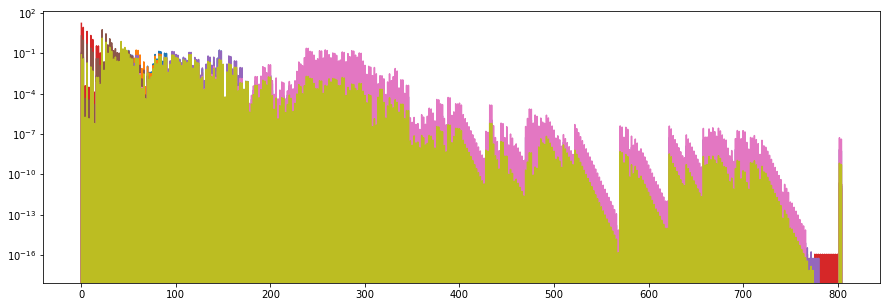

In [116]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(array[1:] - array[:-1]))
plt.yscale('log')

array([-0.19039332,  0.15141551,  0.        ,  0.02653602,  2.27794364,
       -0.37884217,  0.64667494,  0.        , -0.01717843])

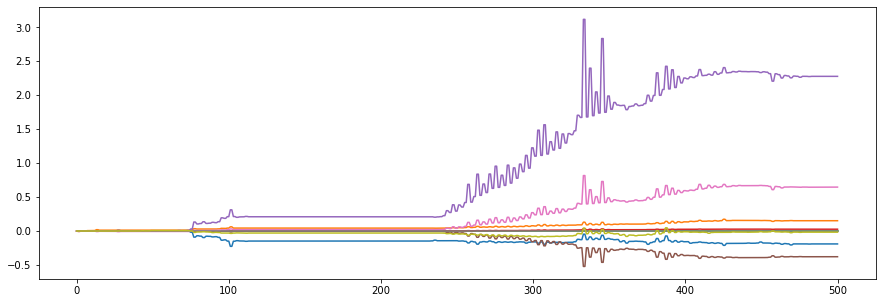

In [114]:
plt.figure(figsize=(15,5))
plt.plot(array-array[0]);
# plt.yscale('log')
# plt.ylim(0.985,1.01)
# plt.xlim(500,5001)
array[-1] - array[0]

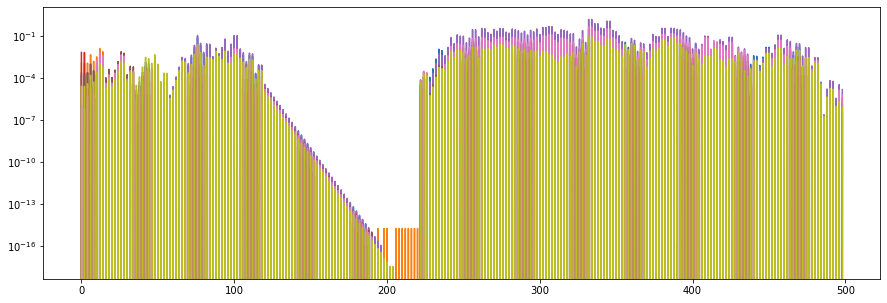

In [96]:
plt.figure(figsize=(15,5))
plt.plot(np.abs(array[1:] - array[:-1]))
plt.yscale('log')